In [1]:
# Import all required libraries
# Read csv the dataframe
# Inspect the dataframe and clean if required
# Make new dataframe with selected feature columns
# Scale the features
# Test train split (Randon seed, shuffle, stratify)


# Create a baseline MLP model and fit the training data
# Evaluate the model results of the baseline
# Run Controlled Experiments to improve model performance
# run final MLP model using the optimal parameters and regularization techniques found from our controlled experiment
# Predict with test data
# assess feature importance
# Add visualizations

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
ttc_initial=pd.read_csv("C:/Users/aakav/dsi/ml13-ttc-delays-project/src_files/ttc_delays_final_df.csv")

In [4]:
ttc_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75504 entries, 0 to 75503
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     75504 non-null  object 
 1   year                     75504 non-null  int64  
 2   month                    75504 non-null  int64  
 3   day_of_month             75504 non-null  int64  
 4   weekday_num              75504 non-null  int64  
 5   time                     75504 non-null  object 
 6   hour                     75504 non-null  int64  
 7   minute                   75504 non-null  int64  
 8   day                      75504 non-null  object 
 9   day_of_week              75504 non-null  int64  
 10  station                  75504 non-null  object 
 11  delay_code               75504 non-null  object 
 12  delay_code_desc          75504 non-null  object 
 13  delay_category           75504 non-null  object 
 14  min_delay             

In [5]:
ttc_initial.head()

,date,year,month,day_of_month,weekday_num,time,hour,minute,day,day_of_week,...,delay_category,min_delay,location_bound,line,major_delay_flag,rush_hour_flag,controllable_delay_flag,season,major_event_flag,major_event_desc
0,2014-01-01,2014,1,1,3,00:21,0,21,Wednesday,3,...,Passenger,55,W,BD,1,0,0,Winter,0,NaN
1,2014-01-01,2014,1,1,3,02:06,2,6,Wednesday,3,...,Passenger,3,W,BD,0,0,0,Winter,0,NaN
2,2014-01-01,2014,1,1,3,03:10,3,10,Wednesday,3,...,Passenger,3,W,BD,0,0,0,Winter,0,NaN
3,2014-01-01,2014,1,1,3,03:20,3,20,Wednesday,3,...,Passenger,5,S,YU,0,0,1,Winter,0,NaN
4,2014-01-01,2014,1,1,3,08:48,8,48,Wednesday,3,...,Staff,5,E,BD,0,1,1,Winter,0,NaN


In [6]:
# Select features and target variable and create new dataframe 


ttc=ttc_initial[['month','day_of_month','weekday_num','hour','day_of_week','delay_category','line','rush_hour_flag','season','controllable_delay_flag']]

In [7]:
ttc.head()

,month,day_of_month,weekday_num,hour,day_of_week,delay_category,line,rush_hour_flag,season,controllable_delay_flag
0,1,1,3,0,3,Passenger,BD,0,Winter,0
1,1,1,3,2,3,Passenger,BD,0,Winter,0
2,1,1,3,3,3,Passenger,BD,0,Winter,0
3,1,1,3,3,3,Passenger,YU,0,Winter,1
4,1,1,3,8,3,Staff,BD,1,Winter,1


In [8]:
# One-hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['delay_category', 'line', 'season']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(ttc[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

## CHANGE 1
#encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names) 
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=ttc.index)

ttc_encoded = pd.concat([ttc.drop(columns=['delay_category', 'line', 'season']), encoded_df], axis=1)
ttc_encoded

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,1,1,3,0,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,3,2,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,3,3,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,3,3,3,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1,3,8,3,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,9,30,2,20,2,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75500,9,30,2,20,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75501,9,30,2,20,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75502,9,30,2,21,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Feature Scaling

# Create a copy of the original 'ttc' dataframe to ensure we're not modifying the original data
standardized_ttc = ttc_encoded.copy()

# Specify the columns that we do NOT want to scale
columns_to_exclude = ['rush_hour_flag','delay_category_Passenger','delay_category_Staff',
                      'delay_category_Technical','delay_category_Weather','line_SHP','line_YU',
                      'season_Spring','season_Summer','season_Winter','controllable_delay_flag'
                      ]

# Select the columns that we want to scale by excluding the 'id' and 'diagnosis' columns
# This will return a list of the numeric columns we need to scale
columns_to_scale = standardized_ttc.columns.difference(columns_to_exclude)

# Initialize the StandardScaler to standardize the selected numeric columns
scaler = StandardScaler()

## CHANGE 2
#standardized_ttc[columns_to_scale] = scaler.fit_transform(ttc[columns_to_scale])
standardized_ttc[columns_to_scale] = scaler.fit_transform(standardized_ttc[columns_to_scale])

# Output the standardized dataframe with the scaled numeric columns
standardized_ttc


,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,-1.519599,-1.683939,-0.031463,-2.142370,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.519599,-1.683939,-0.031463,-1.813028,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.519599,-1.683939,-0.031463,-0.825001,-0.031463,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75500,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75501,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75502,0.781520,1.607590,-0.562198,1.315725,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#set the seed
rng = np.random.default_rng(seed=1)

#split the data
standardized_ttc_train, standardized_ttc_test =train_test_split(
    standardized_ttc, 
    test_size=0.25, 
    random_state=42, 
    shuffle=True, 
    stratify=standardized_ttc['controllable_delay_flag'])

In [11]:
standardized_ttc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56628 entries, 49042 to 7007
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     56628 non-null  float64
 1   day_of_month              56628 non-null  float64
 2   weekday_num               56628 non-null  float64
 3   hour                      56628 non-null  float64
 4   day_of_week               56628 non-null  float64
 5   rush_hour_flag            56628 non-null  int64  
 6   controllable_delay_flag   56628 non-null  int64  
 7   delay_category_Passenger  56628 non-null  float64
 8   delay_category_Staff      56628 non-null  float64
 9   delay_category_Technical  56628 non-null  float64
 10  delay_category_Weather    56628 non-null  float64
 11  line_SHP                  56628 non-null  float64
 12  line_YU                   56628 non-null  float64
 13  season_Spring             56628 non-null  float64
 14  season_S

In [12]:
standardized_ttc_train["controllable_delay_flag"].value_counts(normalize=True)

controllable_delay_flag
0    0.628647
1    0.371353
Name: proportion, dtype: float64

In [13]:
standardized_ttc_train.head()

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
49042,0.781520,-0.775931,1.030008,-2.142370,1.030008,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
70201,-1.231959,0.245578,-0.562198,-0.989672,-0.562198,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
44690,-1.231959,0.813083,-0.031463,0.657040,-0.031463,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
41172,1.069159,-0.094925,1.030008,-0.330987,1.030008,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21420,0.781520,0.245578,-0.562198,-1.154343,-0.562198,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Create a baseline MLP Model with dropout and dense layers

Our initial idea was to conduct a logistic regression with a dense layer, but upon further research, we came across the Multilayer Perceptron (MLP) Model. At a high level, a logistic regression only has 1 latyer, but an MLP can have several hidden layers. 


In [14]:
# Separate Features (X) and Target (Y)

X_train = standardized_ttc_train.drop(columns='controllable_delay_flag')
y_train = standardized_ttc_train['controllable_delay_flag']

X_test = standardized_ttc_test.drop(columns='controllable_delay_flag')
y_test = standardized_ttc_test['controllable_delay_flag']

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
          #validation_split=0.2
          class_weight={0:1, 1:3})  # adjust for imbalance

Epoch 1/10


c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7024 - loss: 0.8750 - val_accuracy: 0.7938 - val_loss: 0.5207
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7962 - loss: 0.7326 - val_accuracy: 0.7938 - val_loss: 0.5190
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7934 - loss: 0.7222 - val_accuracy: 0.7938 - val_loss: 0.5162
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7951 - loss: 0.7102 - val_accuracy: 0.7938 - val_loss: 0.5098
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7950 - loss: 0.7096 - val_accuracy: 0.7938 - val_loss: 0.5169
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7989 - loss: 0.7036 - val_accuracy: 0.7938 - val_loss: 0.5021
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7972 - loss: 0.7025 - val_accuracy: 0.7938 - val_loss: 0.4934
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7966 - loss: 0.7045 - val_accurac

In [16]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7940 - loss: 0.5052
Test Loss: 0.5050
Test Accuracy: 0.7935


In [17]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     11867
           1       0.66      0.92      0.77      7009

    accuracy                           0.79     18876
   macro avg       0.80      0.82      0.79     18876
weighted avg       0.83      0.79      0.80     18876



# Running Controlled Experiments to optimize model accuracy

Create a loop that tests the following permutations:
- Regularization technique -  Model with or without a dropout layer after each dense layer.
- Hyperparameter options - Modes with 32,64, 128 filters.

This will give us 16 model options to compare and choose as out final model to run a SHAP amalysis with.

In [18]:
# Define parameter grid
dense_sizes = [32,64,128]
dropout_options = [True, False]

results = []

for dense_size in dense_sizes:
    for dropout1 in dropout_options:
        for dropout2 in dropout_options:
            
            # Build model_test
            model_test = Sequential()
            model_test.add(Dense(dense_size, activation='relu', input_shape=(X_train.shape[1],)))
            if dropout1:
                model_test.add(Dropout(0.3))
            
            model_test.add(Dense(64, activation='relu'))
            if dropout2:
                model_test.add(Dropout(0.3))
            
            model_test.add(Dense(1, activation='sigmoid')) # Binary classification
            
            # Compile
            model_test.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
            
            # Train
            model_test.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=10, #reduced epochs for speed
                      batch_size=32,
                      class_weight={0:1, 1:3} #adjust for imbalance
                      )
            
            # Evaluate
            test_loss, test_acc = model_test.evaluate(X_test, y_test, verbose=0)
            
            # Save results
            results.append({
                'dense_layer_1': dense_size,
                'dropout_1': dropout1,
                'dropout_2': dropout2,
                'test_loss': round(test_loss, 4),
                'test_accuracy (%)': round(test_acc * 100, 2)
            })


c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6728 - loss: 0.9039 - val_accuracy: 0.7938 - val_loss: 0.5333
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7956 - loss: 0.7476 - val_accuracy: 0.7938 - val_loss: 0.5131
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7982 - loss: 0.7202 - val_accuracy: 0.7938 - val_loss: 0.4852
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7958 - loss: 0.7168 - val_accuracy: 0.7938 - val_loss: 0.4992
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7953 - loss: 0.7161 - val_accuracy: 0.7938 - val_loss: 0.5098
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.7131 - val_accuracy: 0.7938 - val_loss: 0.4907
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7956 - loss: 0.7114 - val_accuracy: 0.7938 - val_loss: 0.5058
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7975 - loss: 0.7049 -

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7049 - loss: 0.8701 - val_accuracy: 0.7938 - val_loss: 0.5066
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7968 - loss: 0.7302 - val_accuracy: 0.7938 - val_loss: 0.5229
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7980 - loss: 0.7089 - val_accuracy: 0.7938 - val_loss: 0.5128
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7960 - loss: 0.7097 - val_accuracy: 0.7938 - val_loss: 0.4943
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7984 - loss: 0.7008 - val_accuracy: 0.7938 - val_loss: 0.5061
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7978 - loss: 0.6979 - val_accuracy: 0.7938 - val_loss: 0.4991
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7964 - loss: 0.7000 - val_accuracy: 0.7938 - val_loss: 0.5146
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7939 - loss: 0.7071 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7044 - loss: 0.8591 - val_accuracy: 0.7938 - val_loss: 0.5288
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7960 - loss: 0.7257 - val_accuracy: 0.7938 - val_loss: 0.5271
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7937 - loss: 0.7212 - val_accuracy: 0.7938 - val_loss: 0.5143
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7974 - loss: 0.7065 - val_accuracy: 0.7930 - val_loss: 0.5326
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7948 - loss: 0.7104 - val_accuracy: 0.7938 - val_loss: 0.5312
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7945 - loss: 0.7134 - val_accuracy: 0.7938 - val_loss: 0.5067
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7988 - loss: 0.7036 - val_accuracy: 0.7938 - val_loss: 0.5091
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.7037 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7233 - loss: 0.8361 - val_accuracy: 0.7938 - val_loss: 0.5266
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7954 - loss: 0.7164 - val_accuracy: 0.7938 - val_loss: 0.5013
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7994 - loss: 0.6959 - val_accuracy: 0.7938 - val_loss: 0.5287
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7947 - loss: 0.7059 - val_accuracy: 0.7938 - val_loss: 0.5171
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7960 - loss: 0.7026 - val_accuracy: 0.7940 - val_loss: 0.4815
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7982 - loss: 0.6947 - val_accuracy: 0.7940 - val_loss: 0.5072
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7967 - loss: 0.6943 - val_accuracy: 0.7939 - val_loss: 0.4981
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7973 - loss: 0.6962 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7094 - loss: 0.8595 - val_accuracy: 0.7938 - val_loss: 0.5162
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.7266 - val_accuracy: 0.7938 - val_loss: 0.5040
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7962 - loss: 0.7156 - val_accuracy: 0.7938 - val_loss: 0.5097
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7979 - loss: 0.7100 - val_accuracy: 0.7938 - val_loss: 0.4842
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7952 - loss: 0.7118 - val_accuracy: 0.7938 - val_loss: 0.4914
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7941 - loss: 0.7120 - val_accuracy: 0.7938 - val_loss: 0.5070
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7967 - loss: 0.7038 - val_accuracy: 0.7938 - val_loss: 0.5219
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7992 - loss: 0.7011 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7300 - loss: 0.8292 - val_accuracy: 0.7938 - val_loss: 0.5023
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7949 - loss: 0.7295 - val_accuracy: 0.7938 - val_loss: 0.5090
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7966 - loss: 0.7101 - val_accuracy: 0.7938 - val_loss: 0.5129
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7954 - loss: 0.7086 - val_accuracy: 0.7938 - val_loss: 0.5125
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7977 - loss: 0.7000 - val_accuracy: 0.7938 - val_loss: 0.5039
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7945 - loss: 0.7100 - val_accuracy: 0.7938 - val_loss: 0.4962
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7984 - loss: 0.6970 - val_accuracy: 0.7939 - val_loss: 0.5090
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7932 - loss: 0.7057 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7417 - loss: 0.8211 - val_accuracy: 0.7937 - val_loss: 0.5018
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7966 - loss: 0.7182 - val_accuracy: 0.7938 - val_loss: 0.5075
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7966 - loss: 0.7107 - val_accuracy: 0.7938 - val_loss: 0.5075
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7979 - loss: 0.7100 - val_accuracy: 0.7936 - val_loss: 0.5461
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7994 - loss: 0.7000 - val_accuracy: 0.7938 - val_loss: 0.5024
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7957 - loss: 0.7038 - val_accuracy: 0.7940 - val_loss: 0.5110
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7948 - loss: 0.7065 - val_accuracy: 0.7938 - val_loss: 0.5305
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7967 - loss: 0.7009 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7439 - loss: 0.8001 - val_accuracy: 0.7938 - val_loss: 0.5006
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7944 - loss: 0.7120 - val_accuracy: 0.7938 - val_loss: 0.4802
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7938 - loss: 0.7108 - val_accuracy: 0.7938 - val_loss: 0.5189
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7962 - loss: 0.7030 - val_accuracy: 0.7938 - val_loss: 0.5150
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7964 - loss: 0.6956 - val_accuracy: 0.7938 - val_loss: 0.5092
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7953 - loss: 0.6981 - val_accuracy: 0.7937 - val_loss: 0.5120
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7951 - loss: 0.7001 - val_accuracy: 0.7938 - val_loss: 0.5147
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7958 - loss: 0.6949 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7292 - loss: 0.8325 - val_accuracy: 0.7938 - val_loss: 0.5250
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7943 - loss: 0.7290 - val_accuracy: 0.7938 - val_loss: 0.5227
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7966 - loss: 0.7185 - val_accuracy: 0.7938 - val_loss: 0.5116
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7950 - loss: 0.7150 - val_accuracy: 0.7938 - val_loss: 0.5019
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7948 - loss: 0.7138 - val_accuracy: 0.7938 - val_loss: 0.5305
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7942 - loss: 0.7121 - val_accuracy: 0.7938 - val_loss: 0.5101
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7935 - loss: 0.7140 - val_accuracy: 0.7938 - val_loss: 0.4972
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7954 - loss: 0.7073 - val_accura

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7349 - loss: 0.8233 - val_accuracy: 0.7938 - val_loss: 0.5116
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7919 - loss: 0.7267 - val_accuracy: 0.7938 - val_loss: 0.4969
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7954 - loss: 0.7126 - val_accuracy: 0.7938 - val_loss: 0.5168
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7938 - loss: 0.7122 - val_accuracy: 0.7938 - val_loss: 0.4840
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7950 - loss: 0.7045 - val_accuracy: 0.7938 - val_loss: 0.5212
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7969 - loss: 0.7039 - val_accuracy: 0.7938 - val_loss: 0.5021
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7992 - loss: 0.6963 - val_accuracy: 0.7938 - val_loss: 0.5015
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7965 - loss: 0.6992 - val_accurac

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7467 - loss: 0.7966 - val_accuracy: 0.7938 - val_loss: 0.5043
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7967 - loss: 0.7173 - val_accuracy: 0.7938 - val_loss: 0.5129
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7966 - loss: 0.7098 - val_accuracy: 0.7938 - val_loss: 0.5362
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7988 - loss: 0.7020 - val_accuracy: 0.7938 - val_loss: 0.5106
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7935 - loss: 0.7079 - val_accuracy: 0.7938 - val_loss: 0.5337
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7936 - loss: 0.7102 - val_accuracy: 0.7938 - val_loss: 0.5181
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7962 - loss: 0.6995 - val_accuracy: 0.7938 - val_loss: 0.5070
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7960 - loss: 0.7016 - val_accura

c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7473 - loss: 0.7924 - val_accuracy: 0.7938 - val_loss: 0.5303
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7967 - loss: 0.7090 - val_accuracy: 0.7938 - val_loss: 0.5089
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7970 - loss: 0.7001 - val_accuracy: 0.7919 - val_loss: 0.5213
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7991 - loss: 0.6940 - val_accuracy: 0.7938 - val_loss: 0.5068
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7955 - loss: 0.7002 - val_accuracy: 0.7939 - val_loss: 0.5133
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7949 - loss: 0.6973 - val_accuracy: 0.7939 - val_loss: 0.4941
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7977 - loss: 0.6909 - val_accuracy: 0.7939 - val_loss: 0.4977
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7967 - loss: 0.6919 - val_accura

In [19]:
# Convert experiment results to DataFrame and compare
results_df = pd.DataFrame(results)
print(results_df)


    dense_layer_1  dropout_1  dropout_2  test_loss  test_accuracy (%)
0              32       True       True     0.5048              79.38
1              32       True      False     0.4950              79.38
2              32      False       True     0.5078              79.39
3              32      False      False     0.4978              79.38
4              64       True       True     0.5100              79.38
5              64       True      False     0.5081              79.38
6              64      False       True     0.5037              79.38
7              64      False      False     0.5154              79.38
8             128       True       True     0.5068              79.38
9             128       True      False     0.5162              79.38
10            128      False       True     0.4926              79.43
11            128      False      False     0.4977              79.38


All models performed at pretty much the same level, with only marginal differences. The best performing mode was the one with dense layers of 128 and 1 dropout layer after the second dense layer (row 10 in th table above).

## Create final model, evaluate results, predict and understand feature importance

We will create the final model below with the dense layer sizes of 128 and 1 droppout layer at the end because this this was the best performing model in our study.

In [27]:
model_final = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model_final.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_final.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32,
          #validation_split=0.2
          class_weight={0:1, 1:3})  # adjust for imbalance

Epoch 1/10


c:\Users\aakav\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1770/1770 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7466 - loss: 0.8061 - val_accuracy: 0.7938 - val_loss: 0.5304
Epoch 2/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7952 - loss: 0.7117 - val_accuracy: 0.7938 - val_loss: 0.5219
Epoch 3/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8002 - loss: 0.6973 - val_accuracy: 0.7942 - val_loss: 0.5151
Epoch 4/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7991 - loss: 0.6958 - val_accuracy: 0.7938 - val_loss: 0.5004
Epoch 5/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7960 - loss: 0.6979 - val_accuracy: 0.7938 - val_loss: 0.5320
Epoch 6/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7977 - loss: 0.6960 - val_accuracy: 0.7938 - val_loss: 0.5090
Epoch 7/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7967 - loss: 0.6998 - val_accuracy: 0.7940 - val_loss: 0.4994
Epoch 8/10
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7953 - loss: 0.6957 - val_accurac

In [29]:
# Evaluate on test set
loss_final, accuracy_final = model_final.evaluate(X_test, y_test)

print(f"Test Loss: {loss_final:.4f}")
print(f"Test Accuracy: {accuracy_final:.4f}")

590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7941 - loss: 0.4979
Test Loss: 0.4977
Test Accuracy: 0.7938


In [30]:
from sklearn.metrics import classification_report

y_pred = (model_final.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     11867
           1       0.66      0.92      0.77      7009

    accuracy                           0.79     18876
   macro avg       0.80      0.82      0.79     18876
weighted avg       0.83      0.79      0.80     18876



Lets use the SHAP sample method to understand featrure importance.

In [57]:
import shap

# Background sample (30 rows)
background_sample = shap.sample(X_train, 30, random_state=42)

# Use the model's predict function
explainer_sample = shap.KernelExplainer(
    lambda x: model_final.predict(x).flatten(),
    background_sample
)

# Compute SHAP values for test data
shap_values_sample = explainer_sample.shap_values(X_test[:100])

# Check shape
print(np.array(shap_values_sample).shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Lets try and compare the feature importance

In [65]:
# Extract SHAP values for the single output class
sample_array = shap_values_sample   # shape (100, 15)

# Compute mean absolute SHAP values per feature
mean_abs_sample = np.mean(np.abs(sample_array), axis=0)

print("SHAP array shape:", sample_array.shape)          # (100, 15)
print("Length of mean_abs_sample:", len(mean_abs_sample))  # 15
print("Number of features:", len(X_test.columns))          # 15

SHAP array shape: (100, 15)
Length of mean_abs_sample: 15
Number of features: 15


In [66]:
# Build DataFrame with feature names and importance scores
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': mean_abs_sample
}).sort_values('mean_abs_shap', ascending=False)

# Print top 15 features
print(importance_df.head(15))

                     feature  mean_abs_shap
8   delay_category_Technical       0.281282
7       delay_category_Staff       0.183923
6   delay_category_Passenger       0.029908
3                       hour       0.021734
11                   line_YU       0.009620
5             rush_hour_flag       0.008905
12             season_Spring       0.007095
0                      month       0.006848
2                weekday_num       0.005714
14             season_Winter       0.005582
1               day_of_month       0.003973
4                day_of_week       0.003961
13             season_Summer       0.003397
10                  line_SHP       0.001440
9     delay_category_Weather       0.001335


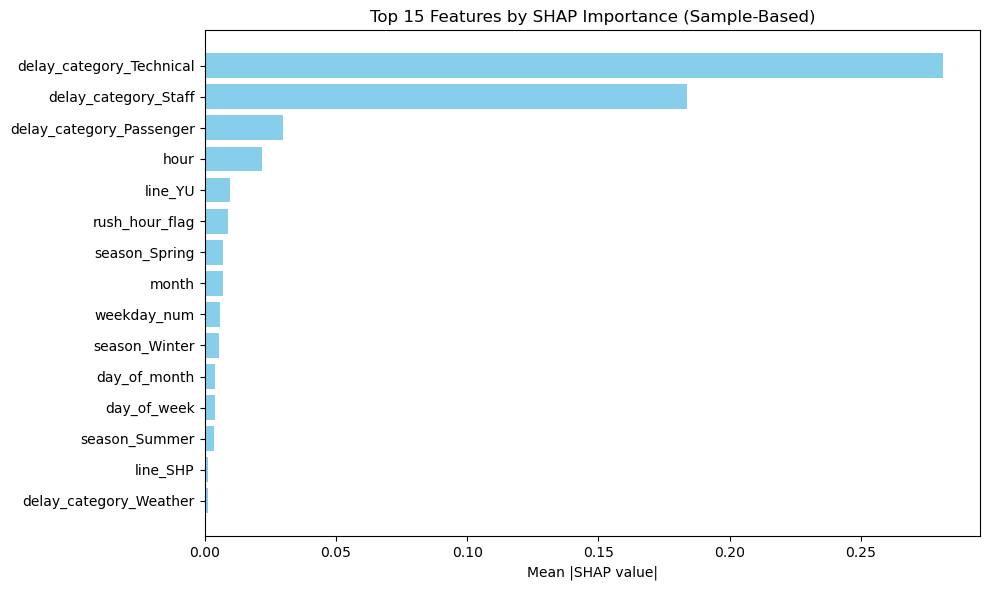

In [ ]:
# Plot bar chart of top 15 features
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance_df['feature'][:15][::-1], importance_df['mean_abs_shap'][:15][::-1], color='skyblue')
plt.xlabel("Mean |SHAP value|")
plt.title("Top 15 Features by SHAP Importance (Sample-Based)")
plt.tight_layout()
plt.show()

In [71]:
# Find the column index for 'hour'
hour_index = list(X_test.columns).index("hour")

# Extract SHAP values for 'hour'
hour_shap_values = shap_values_sample[:, hour_index]

# Extract actual hour values from your test set
hour_values = X_test[:100]["hour"].values

hour_df = pd.DataFrame({
    "hour": hour_values,
    "shap": hour_shap_values
})

# Average SHAP value per hour
hour_mean = hour_df.groupby("hour")["shap"].mean().sort_index()
print(hour_mean)


hour
-2.142370   -0.023242
-1.977699    0.000000
-1.813028    0.000000
-1.319014    0.069536
-1.154343    0.031049
-0.989672    0.027066
-0.825001    0.023654
-0.660329    0.019365
-0.330987    0.002731
-0.166316   -0.006458
-0.001644   -0.012329
 0.163027   -0.018140
 0.327698   -0.018108
 0.492369   -0.023962
 0.657040   -0.016499
 0.821712   -0.018501
 0.986383   -0.028533
 1.151054   -0.026970
 1.315725   -0.025431
 1.480397   -0.016056
 1.645068   -0.019250
Name: shap, dtype: float64
